In [62]:
from philipsNifti import *
destFolder = Path('/Volumes/T5 EVO/UCSD_3DCEUS/SIP/2025.08.26_P03V03/TestInterpolation/UCSD-P03-V03-CE1_10.37.08')
dataName = 'UCSD-P03-V03-CE1_10.37.08_mf_sip_capture_50_2_1_0.raw'
# makeNifti(destFolder, dataName)

In [53]:
print(first_frame.shape)
print(spacing_x, spacing_y, spacing_z)
print(bmode_res)

(135, 532, 360)
0.281572008482675 0.8196222222222223 0.3097634804361516
[4.0, 0.8196222222222223, np.float64(0.281572008482675), np.float64(0.3097634804361516), 2.354581072935503, 0.0, 0.0, 0.0]


Voxel spacing - Elevational (Y): 0.820 mm, Axial Depth (Z): 0.310 mm, Lateral (X): 0.282 mm
Volume shape: (532, 360, 135) (Y, X, Z) = (Axial, Lateral, Elevation)
Physical FOV - X Lateral: 101.4 mm, Y Elevational: 110.6 mm, Z Depth: 164.8 mm


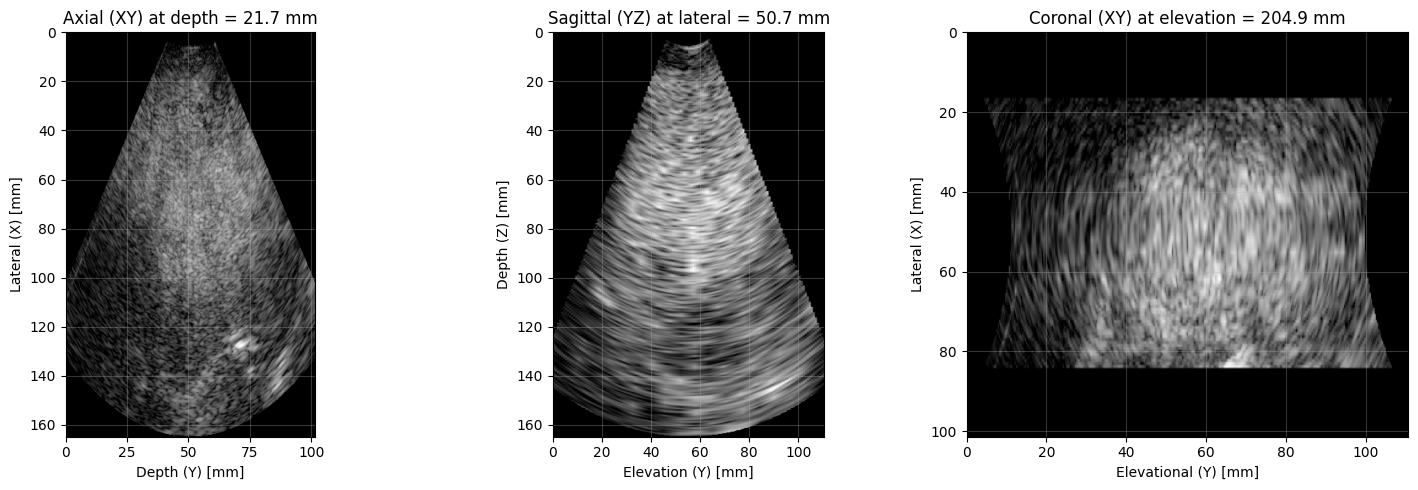

In [60]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

# Load the resolution information
res_file_path = destFolder / "ceus_volume_dims.pkl"

with open(res_file_path, 'rb') as f:
    bmode_res = pickle.load(f)

# Extract voxel spacings (mm/pixel)
# bmode_res format: [4.0, spacing_dim0, spacing_dim1, spacing_dim2, timeconst, ...][Axial, Lateral, Elevation]
spacing_y = bmode_res[1]  # Elevational spacing (1st dimension in pkl)
spacing_x = bmode_res[2]  # Lateral spacing (2nd dimension in pkl)
spacing_z = bmode_res[3]  # Depth spacing (3rd dimension in pkl)

print(f"Voxel spacing - Elevational (Y): {spacing_y:.3f} mm, Axial Depth (Z): {spacing_z:.3f} mm, Lateral (X): {spacing_x:.3f} mm")

# Load first frame
frame_prefix = "ceus_frame"
with open(destFolder / f"{frame_prefix}_100.pkl", 'rb') as f:
    first_frame = pickle.load(f)
# We want to make sure the x is lateral, y is elevational, z is depth
transposed_frame = first_frame.transpose([1,2,0])
print(f"Volume shape: {transposed_frame.shape} (Y, X, Z) = (Axial, Lateral, Elevation)")

# Calculate physical dimensions
n_y, n_z, n_x = first_frame.shape
extent_x = n_x * spacing_x  # Lateral extent in mm
extent_y = n_y * spacing_y  # Elevation extent in mm
extent_z = n_z * spacing_z  # Depth extent in mm

print(f"Physical FOV - X Lateral: {extent_x:.1f} mm, Y Elevational: {extent_y:.1f} mm, Z Depth: {extent_z:.1f} mm")

# Create figure with real dimensions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial slice (XY plane) at z = 70
slice_z = 70
axes[0].imshow(first_frame[slice_z, :, :], cmap='gray', 
               extent=[0, extent_x, extent_z, 0],  # [left, right, bottom, top]
               aspect='equal')
axes[0].set_xlabel('Depth (Y) [mm]')
axes[0].set_ylabel('Lateral (X) [mm]')
axes[0].set_title(f'Axial (XY) at depth = {slice_z * spacing_z:.1f} mm')
axes[0].grid(True, alpha=0.3)

# Sagittal slice (YZ plane) at x = 100
slice_x = 180
axes[1].imshow(first_frame[:, :, slice_x].T, cmap='gray',
               extent=[0, extent_y, extent_z, 0],  # [left, right, bottom, top]
               aspect='equal')
axes[1].set_xlabel('Elevation (Y) [mm]')
axes[1].set_ylabel('Depth (Z) [mm]')
axes[1].set_title(f'Sagittal (YZ) at lateral = {slice_x * spacing_x:.1f} mm')
axes[1].grid(True, alpha=0.3)

# Coronal slice (XZ plane) at y = 70
slice_y = 250
axes[2].imshow(first_frame[:, slice_y, :], cmap='gray',
               extent=[0, extent_y, extent_x, 0],  # [left, right, bottom, top]
               aspect='equal')
axes[2].set_xlabel('Elevational (Y) [mm]')
axes[2].set_ylabel('Lateral (X) [mm]')
axes[2].set_title(f'Coronal (XY) at elevation = {slice_y * spacing_y:.1f} mm')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Voxel spacing - Elevational (Y): 0.826 mm, Axial Depth (Z): 0.832 mm, Lateral (X): 1.126 mm
Volume shape: (133, 180, 134) (Y, X, Z) = (Axial, Lateral, Elevation)
Physical FOV - X Lateral: 202.7 mm, Y Elevational: 110.6 mm, Z Depth: 110.7 mm


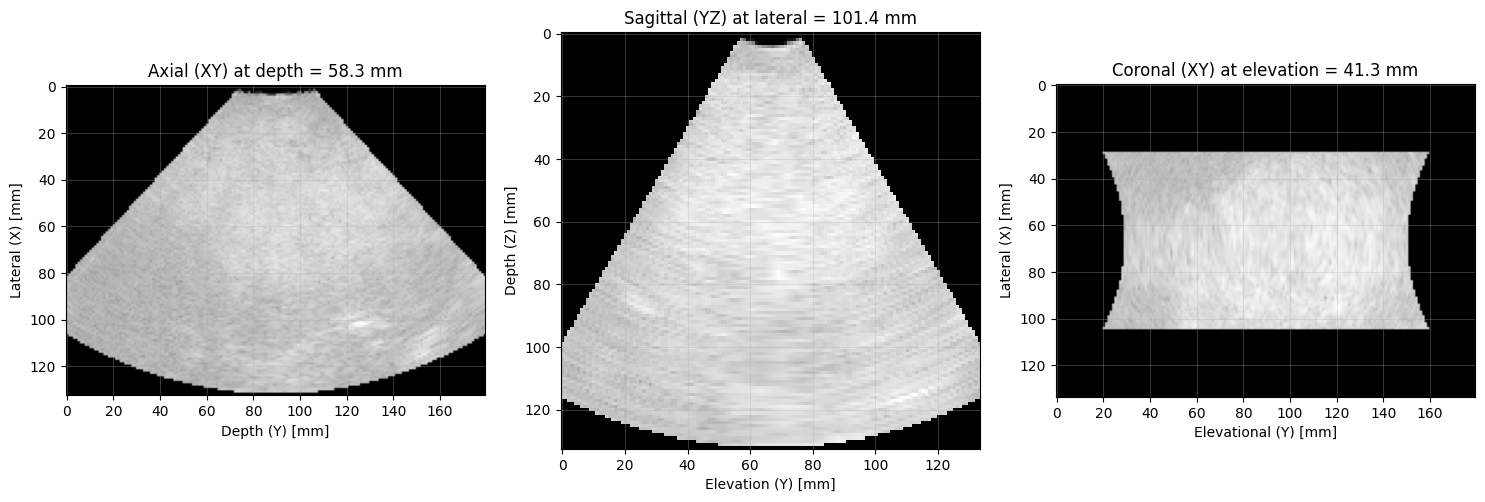

In [61]:
# Load the resolution information
destFolder_original = Path('/Volumes/T5 EVO/UCSD_3DCEUS/SIP/2025.08.26_P03V03/UCSD-P03-V03-CE1_10.37.08')
res_file_path = destFolder_original / "ceus_volume_dims.pkl"

with open(res_file_path, 'rb') as f:
    bmode_res = pickle.load(f)

# Extract voxel spacings (mm/pixel)
# bmode_res format: [4.0, spacing_dim0, spacing_dim1, spacing_dim2, timeconst, ...][Axial, Lateral, Elevation]
spacing_y = bmode_res[1]  # Elevational spacing (1st dimension in pkl)
spacing_x = bmode_res[2]  # Lateral spacing (2nd dimension in pkl)
spacing_z = bmode_res[3]  # Depth spacing (3rd dimension in pkl)

print(f"Voxel spacing - Elevational (Y): {spacing_y:.3f} mm, Axial Depth (Z): {spacing_z:.3f} mm, Lateral (X): {spacing_x:.3f} mm")

# Load first frame
frame_prefix = "ceus_frame"
with open(destFolder_original / f"{frame_prefix}_100.pkl", 'rb') as f:
    first_frame = pickle.load(f)
# We want to make sure the x is lateral, y is elevational, z is depth
transposed_frame = first_frame.transpose([1,2,0])
print(f"Volume shape: {transposed_frame.shape} (Y, X, Z) = (Axial, Lateral, Elevation)")

# Calculate physical dimensions
n_y, n_z, n_x = first_frame.shape
extent_x = n_x * spacing_x  # Lateral extent in mm
extent_y = n_y * spacing_y  # Elevation extent in mm
extent_z = n_z * spacing_z  # Depth extent in mm

print(f"Physical FOV - X Lateral: {extent_x:.1f} mm, Y Elevational: {extent_y:.1f} mm, Z Depth: {extent_z:.1f} mm")

# Create figure with real dimensions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial slice (XY plane) at z = 70
slice_z = 70
axes[0].imshow(first_frame[slice_z, :, :], cmap='gray', 
            #    extent=[0, extent_x, extent_z, 0],  # [left, right, bottom, top]
               aspect='equal')
axes[0].set_xlabel('Depth (Y) [mm]')
axes[0].set_ylabel('Lateral (X) [mm]')
axes[0].set_title(f'Axial (XY) at depth = {slice_z * spacing_z:.1f} mm')
axes[0].grid(True, alpha=0.3)

# Sagittal slice (YZ plane) at x = 100
slice_x = 90
axes[1].imshow(first_frame[:, :, slice_x].T, cmap='gray',
            #    extent=[0, extent_y, extent_z, 0],  # [left, right, bottom, top]
               aspect='equal')
axes[1].set_xlabel('Elevation (Y) [mm]')
axes[1].set_ylabel('Depth (Z) [mm]')
axes[1].set_title(f'Sagittal (YZ) at lateral = {slice_x * spacing_x:.1f} mm')
axes[1].grid(True, alpha=0.3)

# Coronal slice (XZ plane) at y = 70
slice_y = 50
axes[2].imshow(first_frame[:, slice_y, :], cmap='gray',
            #    extent=[0, extent_y, extent_x, 0],  # [left, right, bottom, top]
               aspect='equal')
axes[2].set_xlabel('Elevational (Y) [mm]')
axes[2].set_ylabel('Lateral (X) [mm]')
axes[2].set_title(f'Coronal (XY) at elevation = {slice_y * spacing_y:.1f} mm')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()